# Machine Learning: Classification - Decision Tree
## 1. Introduction
### 1.1 What are Decision Trees?
A Decision Tree is a predictive modelling approach for classification in data mining and machine learning. The Decision Tree iterates through the features about a case (represented in the _branches_) to conclusions about the case’s target value (represented in the _leaves_). They can be employed for binary or multi-class classification. In Decision Trees, leaves represent class labels and branches represent combinations of features that lead to those class labels. The criterion by which branches eventually lead to pure leaves, where 100% of its cases fall into a single class is called _‘entropy’_. Entropy describes the amount of information disorder, if the sample of cases in a node is completely _homogenous_ (i.e. 100% a single class), then the entropy equal 0. If the sample of cases in a node is completely _heterogenous_ (i.e. split 50-50 between the 2 classes), then entropy equals 1. Decision Trees where the target variable takes continuous value are called regression trees. 

Decision Trees are among the most popular machine learning algorithms for classification because of their simplicty and intelligbility as they can be used to visually and explicitly represent decisions similar to human decision-making.

### 1.2 Advantages and Disadvantages

| Advantages | Disadvantages |
|------------|---------------|
| simple to understand and read (by humans) | structure can be upset easily or get overly complex |
| can handle categorical and numerical data | is only heuristic ML algorithm |
| robust against co-linearity (drops redundant features) | |
| white-box or open box model (easy to understand as compared to black box model |  | 
| easy to validate with statistical tests | can still be non-robust as changes in training data may upset entire structure |
| several boosting methods available | |

https://en.wikipedia.org/wiki/Decision_tree_learning

This notebook will focus on decision tree classification with scikit-learn.

https://scikit-learn.org/stable/modules/tree.html

## 2. Decision Tree Classification
### 2.1 The Goal and the Dataset
A medical researcher compiles data for a study. The collected data is about a set of patients, all of whom suffered from the same illness, but during their course of treatment, each patient responded to 1 out of 5 medications: Drug A, Drug B, Drug c, Drug x and y. 

As data scientist you need to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, Cholesterol and Sodium-to-Potassium of patients, and the target is the drug that each patient responded to. 

This is an example of a multi-class classifier. Use the given dataset to to build and train a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

In [1]:
# import necessary libraries
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# download the dataset from IBM storage
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
print("Dataset downloaded.")

Dataset downloaded.


In [3]:
# read the dataset into a Pandas dataframe
med_study = pd.read_csv("drug200.csv", delimiter=",")
print("Shape of Dataset", med_study.shape)
med_study[0:5]

Shape of Dataset (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### 2.2 Data Pre-Processing
Data Cleaning and Pre-Processing includes all steps that transform the data into a format that legible and processible by the ML algorithm.
Although Decision Trees requires very little pre-processing, there are some categorical features need to be encoded as dummies.
The dataset will also be split into training and testing subsets for performance evaluation later on. 

In [4]:
# create a feature set X that includes the patients' features
X = med_study[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

# create a target label Y that represents that different drugs
Y = med_study["Drug"]

print(X[0:5])
print(Y[0:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.113999999999999]
 [28 'F' 'NORMAL' 'HIGH' 7.797999999999999]
 [61 'F' 'LOW' 'HIGH' 18.043]]
0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object


In [5]:
# encode the categorical variables Sex, Blood Pressure, & Cholesterol
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
# split the dataset into training and testing subsets
# testing subset will be 30% of full dataset; random state sets the seed, which can be used for reproducible results
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

### 2.3 Modelling the Decision Tree
The decision tree classifier requires the following hyperparameter:
 - __criterion__: to measure the quality of the split, "entropy" or "gini"
 - __splitter__: strategy to split each node, "best" or "random"
 - __max_depth__: maximum level of nodes on the tree, default=none 
 
After modelling the decision tree, the training subset can be used to train the model.

In [7]:
# model decision tree classifier for drug prescriptions: criterion='entropy', splitter='best', & max_depth=4
drug_pres = DecisionTreeClassifier(criterion="entropy", max_depth = 4, splitter='best')
drug_pres # shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# train the decision tree with the training data
drug_pres.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 2.4 Prediction and Evaluation
Using the testing subset, the model can now be used to make prediction about what type of drug it would prescribe to a patient. Since the testing subset already has true labels (true prescriptions), they can be compared to the predicted labels in order to evaluate the performance of the model on out-of-sample data.

In [11]:
# make predictions called y_hat
Y_hat = drug_pres.predict(X_testset)

# evaluate the model's accuracy
print("Decision Tree's General Accuracy: %.5f" % metrics.accuracy_score(Y_testset, Y_hat))
print("Decision Tree's F1 Score: %.5f" % metrics.f1_score(Y_testset, Y_hat, average='weighted'))

Decision Tree's General Accuracy: 0.98333
Decision Tree's F1 Score: 0.98332


### 2.4 Visualizing Decision Trees
Given the limited depth and high accuracy of this drug-prescription decision tree model, a visual representation may help to illustrate the process of decision-making and guide medical professional to make prescription for their patients with the same illness.  

In [ ]:
# packages for visualization
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

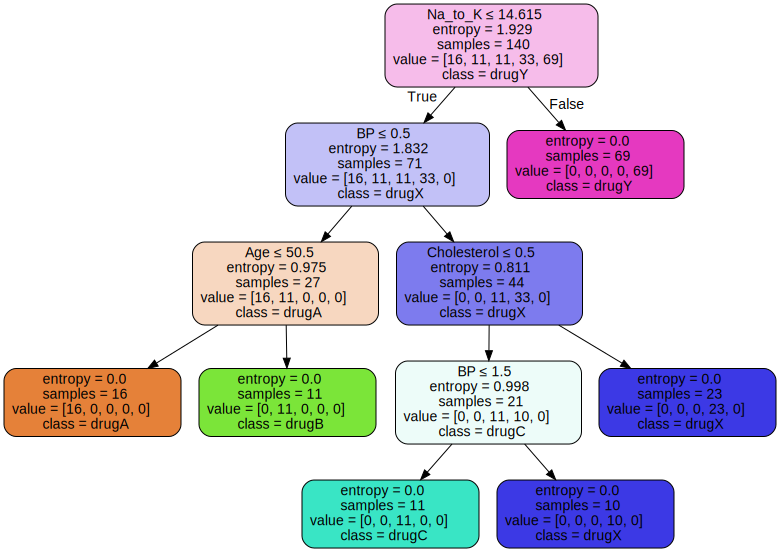

In [13]:
import pydotplus
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(drug_pres, # this is the decision tree
                                out_file=None, 
                                feature_names=med_study.columns[0:5], # those are the name of features 
                                class_names= np.unique(Y),  # those are the drug names
                                filled=True,
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph

__Reading the Decision Tree Graph__

The first line in each node represents a condition of a feature from the feature set. If the condition is _true_, the tree unfolds _left_ into a new branch or leave. If the condition is _false_, the tree unfolds _right_ into new branch or leave. The second line in each node (and the first line in each leave) is entropy. Recall that the goal of the decision tree is to find the combination of features that lead to pure leaves. If a combination of features leads to entropy = 0, the leave is pure and there is only one possible outcome of all given classes. But if entropy is > 0, then the branch will be split again. The decision tree will split until it reaches its pre-specified maximum depth, or without out one, until all leaves are pure.

For the graph above, if a patient has a sodium-to-potassium level > 14.615, then the decision categorically recommends DrugY, without needing to consider other features of the patient. If a patients sodium-to-potassium level is ≤ 14.615, then the decision tree considers whether the patient's blood pressure value is at a certain threshold (this refer to encoded labels). Thus, the decision tree graph reveals what combination of features 'predict' what type of drug a patient should be prescribed for their illness.